Image shape: torch.Size([3, 256, 256])
Item ID: id_00000001
Image name: img/WOMEN/Blouses_Shirts/id_00000001/02_2_side.jpg


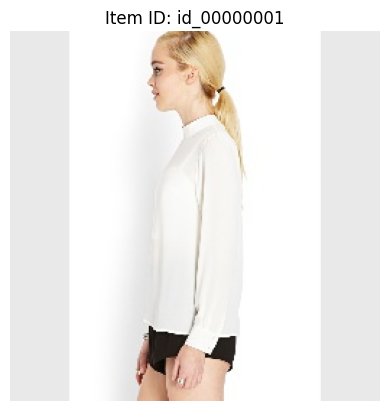

In [3]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.dataloaders.deepfashion_retrievals import DeepFashionRetrieval
from torchvision import transforms
import matplotlib.pyplot as plt


img_dir = "/Users/elenezuroshvili/Desktop/Thesis/fashion-multitask-model/data/retrieval/img"
anno_path = "/Users/elenezuroshvili/Desktop/Thesis/fashion-multitask-model/data/retrieval/list_eval_partition.txt"


dataset = DeepFashionRetrieval(
    img_dir=img_dir,
    anno_path=anno_path,
    split="query",
    transform=transforms.ToTensor()
)


image, item_id, img_name = dataset[0]

print("Image shape:", image.shape)
print("Item ID:", item_id)
print("Image name:", img_name)


plt.imshow(image.permute(1, 2, 0))  # Convert [C,H,W] → [H,W,C]
plt.title(f"Item ID: {item_id}")
plt.axis("off")
plt.show()

Attribute 0: floral
Category 0: Anorak


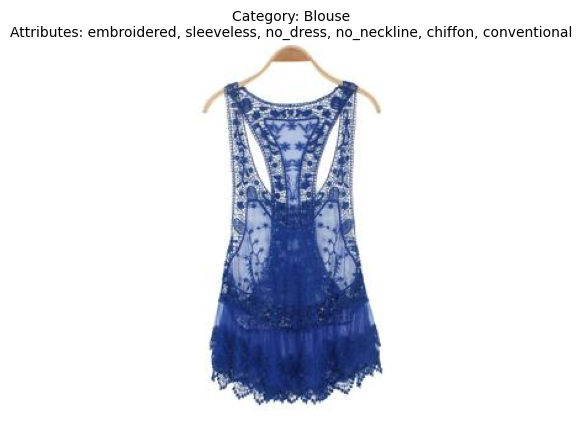

In [6]:
from src.dataloaders.deepfashion_attributes import DeepFashionAttributes
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

img_dir = "../data/attribute pred"
anno_dir = "../data/attribute pred/Anno_fine"

# Attributes 
attr_dict = {}
attr_path = "../data/attribute pred/Anno_fine/list_attr_cloth.txt"
with open(attr_path, "r") as f:
    attr_lines = f.readlines()[2:]  
    for i, line in enumerate(attr_lines):
        name, attr_type = line.strip().split()
        attr_dict[i] = name

# Categories 
cat_dict = {}
cat_path = "../data/attribute pred/Anno_fine/list_category_cloth.txt"
with open(cat_path, "r") as f:
    cat_lines = f.readlines()[2:]  
    for i, line in enumerate(cat_lines):
        name, cat_type = line.strip().split()
        cat_dict[i] = name

print("Attribute 0:", attr_dict[0])
print("Category 0:", cat_dict[0])


# Loader
dataset = DeepFashionAttributes(
    img_dir=img_dir,
    anno_dir=anno_dir,
    split="train",
    transform=transforms.ToTensor()
)


image, category, attributes = dataset[0]


category_name = cat_dict[category.item()] if isinstance(category, torch.Tensor) else cat_dict[category]


active_attrs = [attr_dict[i] for i, val in enumerate(attributes) if val == 1]


plt.imshow(image.permute(1, 2, 0))
plt.title(f"Category: {category_name}\nAttributes: {', '.join(active_attrs)}", fontsize=10)
plt.axis("off")
plt.show()
